<a href="https://colab.research.google.com/github/RRDajay/Machine_Learning_Collection/blob/master/VGG13_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 1000
num_epochs = 5

# Data loader
transform = transforms.Compose([transforms.Resize(50),
                                transforms.ToTensor(),
                                ])

train_set = torchvision.datasets.MNIST(root='dataset/', train=True, transform=transform, download=True)
test_set = torchvision.datasets.MNIST(root='dataset/', train=False, transform=transform, download=True)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

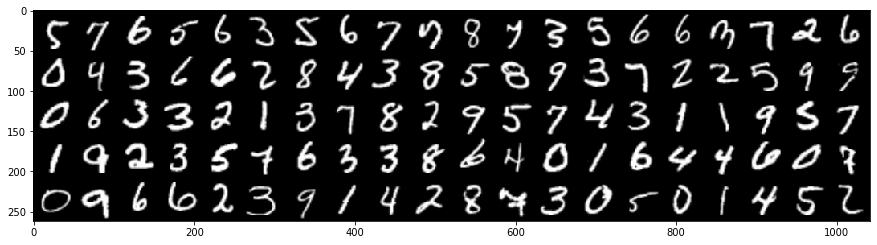

In [2]:
# Data Visualization
import numpy as np
from matplotlib import pyplot as plt

def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(15,30))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

img_samples, _ = next(iter(train_loader))
show(torchvision.utils.make_grid(img_samples[0:100], nrow=20))

In [3]:
# Model creation
class CNN(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)

    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)

    self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)

    self.conv7 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv8 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)

    self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
    
    self.fc1 = nn.Linear(in_features=512, out_features=4096)
    self.fc2 = nn.Linear(in_features=4096, out_features=1000)
    self.out = nn.Linear(in_features=1000, out_features=10)

  def forward(self, x):

    # First Conv layers
    x_conv1 = self.conv1(x)
    x = F.relu(x_conv1, inplace=True)
    x_conv2 = self.conv2(x)
    x = F.relu(x_conv2, inplace=True)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    # 2nd Conv layers
    x_conv3 = self.conv3(x)
    x = F.relu(x_conv3, inplace=True)
    x_conv4 = self.conv4(x)
    x = F.relu(x_conv4, inplace=True)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    # 3rd Conv layers
    x_conv5 = self.conv5(x)
    x = F.relu(x_conv5, inplace=True)
    x_conv6 = self.conv6(x)
    x = F.relu(x_conv6, inplace=True)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    # 4rth Conv layers
    x_conv7 = self.conv7(x)
    x = F.relu(x_conv7, inplace=True)
    x_conv8 = self.conv8(x)
    x = F.relu(x_conv8, inplace=True)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    # 5th Conv layers
    x_conv9 = self.conv9(x)
    x = F.relu(x_conv9, inplace=True)
    x_conv10 = self.conv10(x)
    x = F.relu(x_conv10, inplace=True)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    # Linear layers
    x = x.reshape(-1, 512)
    x = self.fc1(x)
    x = self.fc2(x)
    x_out = self.out(x)

    return x_out, x_conv1, x_conv2, x_conv3, x_conv4, x_conv5, x_conv6, x_conv7, x_conv8, x_conv9, x_conv10 


In [4]:
# Instantiate model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN()
model = model.to(device)

# Optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, patience=2, verbose=True)

In [5]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):

  losses = []
  for batch_idx, (data, targets) in enumerate(train_loader):
    
    data = data.to(device)
    targets = targets.to(device)

    # Forward
    scores, _, _, _, _, _, _, _, _, _, _,  = model(data)
    loss = criterion(scores, targets)
    losses.append(loss.item())

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch_idx) % 25 == 0:
      print(f"Epoch: {epoch+1}/{num_epochs}\t\t\tStep: {batch_idx+1}/{n_total_steps}\t\t\tloss: {sum(losses)/len(losses)}")
  
  scheduler.step(sum(losses)/len(losses))



Epoch: 1/5			Step: 1/60			loss: 2.30511736869812
Epoch: 1/5			Step: 26/60			loss: 2.3104010086793165
Epoch: 1/5			Step: 51/60			loss: 2.265181798560947
Epoch: 2/5			Step: 1/60			loss: 1.8574163913726807
Epoch: 2/5			Step: 26/60			loss: 1.6349457548214839
Epoch: 2/5			Step: 51/60			loss: 1.490679380940456
Epoch: 3/5			Step: 1/60			loss: 0.6548059582710266
Epoch: 3/5			Step: 26/60			loss: 0.5476015336238421
Epoch: 3/5			Step: 51/60			loss: 0.39618298703548954
Epoch: 4/5			Step: 1/60			loss: 0.15441395342350006
Epoch: 4/5			Step: 26/60			loss: 0.12798138793844444
Epoch: 4/5			Step: 51/60			loss: 0.11400129689889796
Epoch: 5/5			Step: 1/60			loss: 0.06561174988746643
Epoch: 5/5			Step: 26/60			loss: 0.0608523553953721
Epoch: 5/5			Step: 51/60			loss: 0.05585051919607555


In [8]:
# Model Validation
def model_validation(loader):
  
  if loader.dataset.train is True:
    print("Training dataset will be used for validation...")

  else:
    print("Testing dataset will be used for validation...")

  with torch.no_grad():

    n_correct, n_samples = 0, 0

    for data, labels in test_loader:
      
      data = data.to(device)
      labels = labels.to(device)
      
      outputs, _, _, _, _, _, _, _, _, _, _, = model(data)
      _, predictions = torch.max(outputs, 1)
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()

    acc = 100 * n_correct/n_samples
    
    print(f"\tAccuracy: {acc}")

model_validation(train_loader)
model_validation(test_loader)

Training dataset will be used for validation...
	Accuracy: 98.01
Testing dataset will be used for validation...
	Accuracy: 98.01


In [26]:
_, x_conv1, x_conv2, x_conv3, x_conv4, x_conv5, x_conv6, x_conv7, x_conv8, x_conv9, x_conv10 = model(img_samples.to(device))

# Intermediate Layers Visualization

def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(15,30))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

# show(torchvision.utils.make_grid(x_conv1.cpu()[0], nrow=20))



RuntimeError: ignored

In [ ]:
# TODO:

# Data normalization, augmentation
# Check intermediate layer outputs